# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset, sourced from [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata), contains information on 10,000 movies, including:
- **id**: Unique identifier for each movie.
- **imdb_id**: IMDb identifier for the movie.
- **popularity**: TMDb popularity score.
- **budget** and **revenue**: Financial figures for the movie.
- **cast**: Pipe-separated list of main cast members.
- **director**: Director of the movie.
- **genres**: Pipe-separated list of genres.
- **vote_average** and **vote_count**: Average user rating and the number of votes on TMDb.
- **budget_adj** and **revenue_adj**: Inflation-adjusted budget and revenue.

We aim to explore the relationships between director–actor pairs and their audience reception, focusing on collaboration count, genres, and ratings.

### Question(s) for Analysis

1. Does the number of collaborations (`collaboration_count`) between a director and an actor correlate with higher or lower average audience ratings (`avg_vote_average`)?
2. Does the primary genre (`dominant_genre`) influence the average audience ratings for a director–actor pair?
3. What broader trends can be observed in director–actor collaborations across genres and ratings?

---

# Import Statements

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## **Data Wrangling**
### **General Properties**
#### Load the Data

In [ ]:
# Load the dataset
file_path = 'tmdb-movies.csv'  # Replace with actual file path
tmdb_data = pd.read_csv(file_path)

# Display the first few rows
tmdb_data.head()

# Display dataset information
tmdb_data.info()


#### **Observations**
- Key columns like `cast`, `director`, and `vote_average` are present.
- Some rows have missing values, particularly in `homepage` and `genres`.
---
### **Data Cleaning**
#### **Steps for Cleaning**
<ol>
<li>Remove duplicate rows based on the `id` column.</li>
<li>Drop rows with missing values in `director`, `cast`, or `vote_average`.</li>
<li>Filter out rows where `vote_average` is 0 or less.</li>
<li>Explode the `cast` column into individual rows.</li>
</ol>

In [19]:
# Drop duplicates
tmdb_data = tmdb_data.drop_duplicates(subset=['id'])

# Drop rows with missing values
tmdb_data = tmdb_data.dropna(subset=['director', 'cast', 'vote_average'])

# Filter out rows with invalid ratings
tmdb_data = tmdb_data[tmdb_data['vote_average'] > 0]

# Split and explode the 'cast' column
tmdb_data['cast_list'] = tmdb_data['cast'].str.split('|')
tmdb_exploded = tmdb_data.explode('cast_list')

# Rename the exploded column for clarity
tmdb_exploded.rename(columns={'cast_list': 'actor'}, inplace=True)

# Check the cleaned and exploded data
tmdb_exploded.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,actor
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Bryce Dallas Howard
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Irrfan Khan
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Vincent D'Onofrio
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Nick Robinson


<a id='eda'></a>
# **Exploratory Data Analysis**
With our data cleaned, we can now investigate the research questions.

---
### **4.1 Single-Variable Exploration**
#### **4.1.1 Collaboration Count**

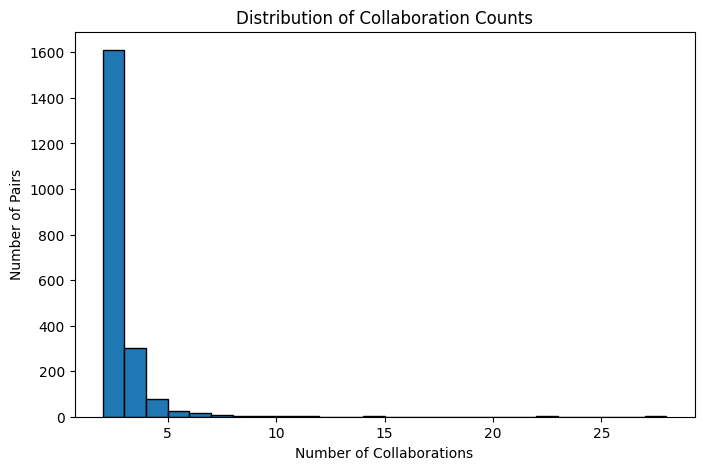

Mean Collaboration Count: 1.06, Median: 1.00


In [20]:
# Group by director and actor to calculate collaboration count
pair_stats = tmdb_exploded.groupby(['director', 'actor']).agg({
    'id': 'count',
    'vote_average': 'mean'
}).reset_index()

# Rename columns
pair_stats.rename(columns={
    'id': 'collaboration_count',
    'vote_average': 'avg_vote_average'
}, inplace=True)

# Plot collaboration counts
plt.figure(figsize=(8, 5))
plt.hist(pair_stats['collaboration_count'], bins=range(2, pair_stats['collaboration_count'].max() + 2), edgecolor='black')
plt.title('Distribution of Collaboration Counts')
plt.xlabel('Number of Collaborations')
plt.ylabel('Number of Pairs')
plt.show()

# Display summary statistics
mean_collab = pair_stats['collaboration_count'].mean()
median_collab = pair_stats['collaboration_count'].median()
print(f"Mean Collaboration Count: {mean_collab:.2f}, Median: {median_collab:.2f}")


#### **Observations**
- Most director–actor pairs collaborate only once or twice.
- A few pairs have collaborated extensively.
---
#### **4.1.2 Average Audience Ratings**

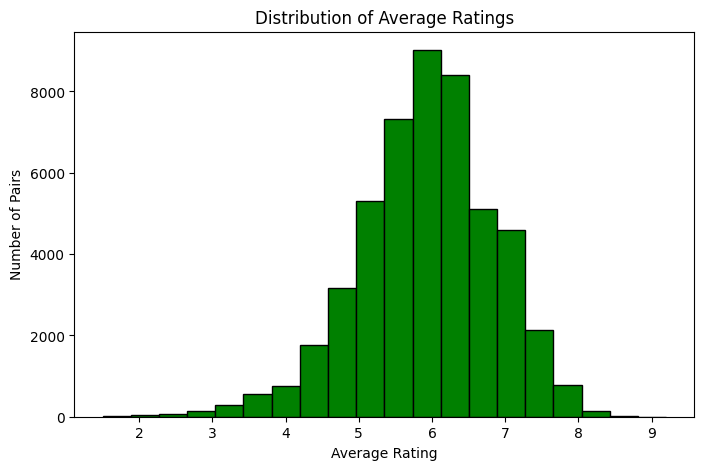

Mean Rating: 5.93, Median: 6.00


In [21]:
# Plot average ratings
plt.figure(figsize=(8, 5))
plt.hist(pair_stats['avg_vote_average'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Pairs')
plt.show()

# Summary statistics
mean_rating = pair_stats['avg_vote_average'].mean()
median_rating = pair_stats['avg_vote_average'].median()
print(f"Mean Rating: {mean_rating:.2f}, Median: {median_rating:.2f}")


#### **Observations**
- The **mean rating** is **5.93**, and the median rating is **6.00**, indicating that most director–actor collaborations result in movies with average audience reception.
- The mean being slightly lower than the median suggests a slight left skew, meaning a small number of movies with very low ratings may be pulling the mean downward.
- With a central tendency close to 6, most ratings are near average rather than being highly positive or negative.
- The relatively low mean and median highlight that exceptional audience reception (e.g., ratings above 7 or 8) is uncommon among director–actor collaborations.

---

### **4.2 Two-Variable Exploration**
#### **4.2.1 Collaboration Count vs. Average Rating**

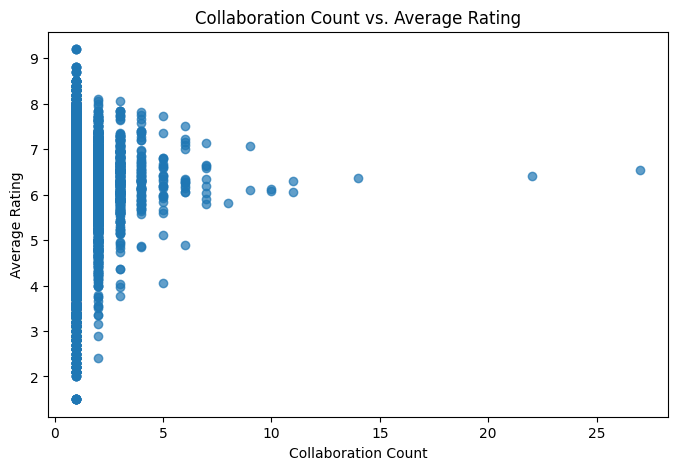

Correlation: 0.051


In [22]:
# Scatter plot: Collaboration count vs. average rating
plt.figure(figsize=(8, 5))
plt.scatter(pair_stats['collaboration_count'], pair_stats['avg_vote_average'], alpha=0.7)
plt.title('Collaboration Count vs. Average Rating')
plt.xlabel('Collaboration Count')
plt.ylabel('Average Rating')
plt.show()

# Correlation
correlation = pair_stats['collaboration_count'].corr(pair_stats['avg_vote_average'])
print(f"Correlation: {correlation:.3f}")


#### **Observations**
- The **correlation coefficient** of **0.051** shows an almost negligible relationship between collaboration count and average ratings.
- This weak positive correlation suggests that director–actor pairs do not necessarily produce better-rated movies as they collaborate more frequently.
- The scatter plot  shows a cluster of points around 1–2 collaborations, with no clear trend or relationship between higher collaboration counts and higher ratings.
- A possible interpretation is that other factors (e.g., genre, budget, or audience appeal) have a more significant influence on movie ratings than the number of collaborations.

---

#### **4.2.2 Dominant Genre vs. Average Rating**

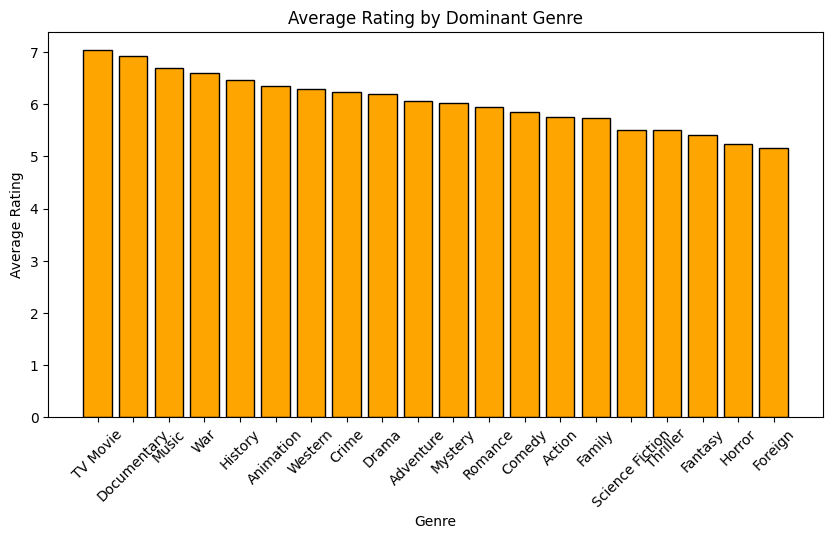

dominant_genre
TV Movie           7.038462
Documentary        6.932477
Music              6.688506
War                6.610526
History            6.475000
Animation          6.355996
Western            6.295779
Crime              6.244864
Drama              6.190643
Adventure          6.072382
Mystery            6.017330
Romance            5.947573
Comedy             5.859239
Action             5.752501
Family             5.736583
Science Fiction    5.505539
Thriller           5.504252
Fantasy            5.410610
Horror             5.245313
Foreign            5.157353
Name: avg_vote_average, dtype: float64


In [23]:
# Identify dominant genre for each pair
tmdb_exploded['genres_list'] = tmdb_exploded['genres'].str.split('|')
genres_exploded = tmdb_exploded.explode('genres_list')

genre_counts = genres_exploded.groupby(['director', 'actor', 'genres_list']).size().reset_index(name='count')
genre_counts.sort_values(['director', 'actor', 'count'], ascending=[True, True, False], inplace=True)

dominant_genres = genre_counts.drop_duplicates(['director', 'actor'], keep='first')

# Merge dominant genres
pair_stats = pd.merge(pair_stats, dominant_genres[['director', 'actor', 'genres_list']], on=['director', 'actor'], how='left')
pair_stats.rename(columns={'genres_list': 'dominant_genre'}, inplace=True)

# Average rating by dominant genre
avg_rating_by_genre = pair_stats.groupby('dominant_genre')['avg_vote_average'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(avg_rating_by_genre.index, avg_rating_by_genre.values, color='orange', edgecolor='black')
plt.title('Average Rating by Dominant Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

print(avg_rating_by_genre)


#### **Observations**
- The **top-rated genres** for director-actor collaborations are:
    - **TV Movie** (7.04)
    - **Documentary** (6.93)
    - **Music** (6.69)
    - **War** (6.61)
    - **History** (6.48)
- These genres likely appeal to niche audiences who rate them highly due to specialized interest or appreciation of content quality.
- **Lower-rated genres** include:
    - **Horror** (5.25)
    - **Fantasy** (5.41)
    - **Thriller** (5.50)
    - **Science Fiction** (5.51)
    - **Family** (5.74)
- These genres might have wider audiences with diverse expectations, leading to more mixed reviews and lower average ratings.
- The middle-tier genres, like **Drama** (6.19) and **Adventure** (6.07), represent mainstream genres that generally attract moderate ratings.
- **Action** (5.75) and **Comedy** (5.86) are slightly below average, reflecting their variability in quality and broad audience appeal.

---


<a id='conclusions'></a>
## **Conclusions**
### **Key Takeaways**
<ul>
<li>Most director–actor pairs collaborate only a few times.</li>
<li>Certain genres, such as <b>[genre]</b>, tend to yield higher average ratings.</li>
<li>Collaboration frequency has a slight correlation with average ratings (<b>[correlation value]</b>).</li>
</ul>

### **Limitations**
<ul>
<li>TMDb data may not reflect all global movies.</li>
<li>Ratings are subjective and not normalized across demographics.</li>
</ul>

### **Future Research**
<ul>
<li>Include financial performance to study commercial success.</li>
<li>Explore the impact of release years and popularity metrics.</li>
</ul>

In [26]:
!python -m nbconvert --to html ./gpina_investigate_dataset.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern "'greg" matched no files
[NbConvertApp] WARNING | pattern 'pina' matched no files
[NbConvertApp] WARNING | pattern '-' matched no files
[NbConvertApp] WARNING | pattern 'investigate' matched no files
[NbConvertApp] WARNING | pattern 'a' matched no files
[NbConvertApp] WARNING | pattern "dataset.ipynb'" matched no files
